In [40]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt

In [41]:
arr = pd.read_csv("Kmean_dataset.csv")
x=arr.to_numpy()

X_train=x

In [42]:
def cost(x,centroid,near_indx):
    m=x.shape[0]
    cost=np.sum(np.square(x-centroid[near_indx]))/m
    return cost

In [43]:
def normalise(x):
  """
  x= array(m,n) = trainig set m= no of examples, n= no.of features
  mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
  """
  n=np.shape(x[1:][0])
  mu = np.mean(x, axis=0)
  sigma = np.std(x, axis=0) + 1e-10
  x_normalised= (x-mu)
  x_normalised = x_normalised/sigma
  return x_normalised

In [44]:
def neighbour_dist(x, x_test):
  """
  x:array(m,n): train dataset
  x_test:test dataset(a,n):a is number of test examples
  dist: array(a,m): each row contains dist of a training point from all other points.
  """
  m = x.shape[0]
  n = x.shape[1:][0]
  a = x_test.shape[0]
  dist = []
  for i in range(a):
    distance = np.reshape(np.sum((x[:, np.newaxis, :] - x_test[i]) ** 2, axis=2), (1, -1))
                          
      
    dist.append(distance)
  euc_dist = np.array(dist)
  return euc_dist.reshape(-1, m)



In [45]:
def closest_centroid(x,centroid):
    """
    x:array(m,n):test dataset
    centroid:array(k,n): location of all k centroids
    near_indx:array(m,):index of nearest centroid to each point
    """
    
    dist=neighbour_dist(centroid,x)
    
    near_indx=np.argmin(dist,axis=1)
    
    return near_indx

In [46]:
def one_hot_encoding(y,k):
    m=y.size
    n=k
    p=np.zeros((m,n))
    p[np.arange(m),y]=1
    return p


In [47]:
def centroid_update(x,near_indx,k):
    """ 
    k: number of centroid
    
    """
    m,n=x.shape
    cen_indx_one_hot=one_hot_encoding(near_indx,k)
    
    near_matrix=np.zeros((n,m,k))
   
    
    for i in range (n):
        
        near_matrix[i]=cen_indx_one_hot*np.reshape(x[:,i],(-1,1))
    centroid_new=np.sum(near_matrix,axis=1)
    
    div=np.bincount(near_indx,minlength=k)+1e-15
    new_posn=(centroid_new.T)/(div.reshape(-1,1))

    return new_posn

In [48]:
def random_init_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices, :]

In [49]:
def iterate(x,k,itr_nos):
    m,n=x.shape
    centroid=random_init_centroids(x,k)
   
    for i in range(itr_nos):
        near_indx=closest_centroid(x,centroid)
        centroid=centroid_update(x,near_indx,k)
        if i%100==0:
            print(cost(x,centroid,near_indx))
    costn=cost(x,centroid,near_indx)
    return centroid,costn

In [50]:
c,costn=iterate(normalise(X_train),3,1000)
y=normalise(X_train)


9.227410288359556


7.184049302356977
7.184049302356977
7.184049302356977
7.184049302356977
7.184049302356977
7.184049302356977
7.184049302356977
7.184049302356977
7.184049302356977


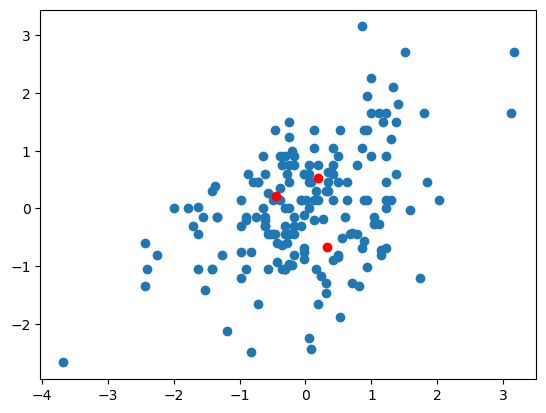

In [51]:
plt.scatter(y[:,2],y[:,3])
plt.scatter(c[:,2],c[:,3],color='red')
plt.show()

In [55]:
dist=neighbour_dist(normalise(X_train), c)
print(dist.shape)
answer=np.argmin(dist,axis=0)+1
df = pd.DataFrame(answer)
df.to_csv('kmeans_output.csv', index=False, header=False)

(3, 178)
